Cifar 10 - Image Classification - Python - Keras - Kamlesh
---



---



# Importing Libraries

In [ ]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


## Loading and Preprocesing Dataset

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Building CNN Model

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/10
782/782 [==============================] - 12s 13ms/step - loss: 1.7373 - accuracy: 0.4041 - val_loss: 1.5896 - val_accuracy: 0.4172
Epoch 2/10
782/782 [==============================] - 10s 12ms/step - loss: 1.1839 - accuracy: 0.5761 - val_loss: 1.0465 - val_accuracy: 0.6272
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.9966 - accuracy: 0.6471 - val_loss: 0.9123 - val_accuracy: 0.6820
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 0.8879 - accuracy: 0.6886 - val_loss: 0.9442 - val_accuracy: 0.6691
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.8124 - accuracy: 0.7169 - val_loss: 0.7520 - val_accuracy: 0.7407
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.7546 - accuracy: 0.7405 - val_loss: 0.6761 - val_accuracy: 0.7681
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.7035 - accuracy: 0.7579 - val_loss: 0.6780 - val_accuracy: 0

# Testing Random Data

313/313 [==============================] - 1s 3ms/step


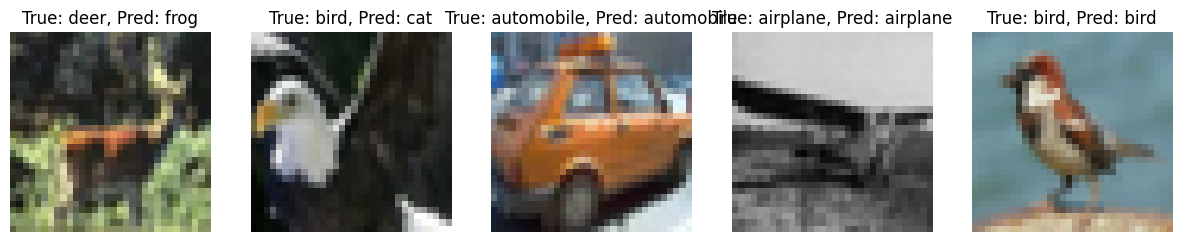

In [ ]:
import random
import matplotlib.pyplot as plt

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Make predictions
predictions = model.predict(x_test)

# Plot random images with predictions
num_images = 5
random_indices = random.sample(range(x_test.shape[0]), num_images)
plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[np.argmax(y_test[idx])]}, Pred: {class_names[np.argmax(predictions[idx])]}")
    plt.axis('off')

plt.show()